Due date: **October 24, 2023**

# Instructions:
- The homework is due by 11:59PM EST on the due date. Please upload a PDF
version of your assignment on ZoneCours.
- The homework is worth 20% of the course’s final grade.
- Assignments are to be done individually.

- Please provide your code answers in the code block under each question and verbal answers in text boxes assigned in the notebook (where applicable).
- Please run the notebook before the submission so that the outputs are displayed.
- Please make sure that your results are reproducible. You may use random seeds from `random` and `numpy` packages. For `scikit-learn` modules, you may use the `random_state` argument.

In [ ]:
# enter you full name and HEC ID
full_name = "Charles Julien"
HEC_ID = "11289334"

# Classification **(7pt)**
We will use a synthetic dataset. It is available [here](https://github.com/davoodwadi/MATH60629A.A2023-MACHINE-LEARNING-I/raw/main/data/a22_devoir_q2-classification.npz).

Once the data are accessible from your current working directory, you can
load them using the following code:

`data = np.load("a22_devoir_q2-classification.npz")`

`X = data["X"]`

`y = data["y"]`

In [ ]:
# download and load the data
!wget -P /content https://github.com/davoodwadi/MATH60629A.A2023-MACHINE-LEARNING-I/raw/main/data/a22_devoir_q2-classification.npz

import numpy as np
data = np.load('a22_devoir_q2-classification.npz')
X = data["X"]
y = data["y"]

--2023-10-24 20:07:58--  https://github.com/davoodwadi/MATH60629A.A2023-MACHINE-LEARNING-I/raw/main/data/a22_devoir_q2-classification.npz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davoodwadi/MATH60629A.A2023-MACHINE-LEARNING-I/main/data/a22_devoir_q2-classification.npz [following]
--2023-10-24 20:07:58--  https://raw.githubusercontent.com/davoodwadi/MATH60629A.A2023-MACHINE-LEARNING-I/main/data/a22_devoir_q2-classification.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2890 (2.8K) [application/octet-stream]
Saving to: ‘/content/a22_devoir_q2-classification.npz’

a22_devoir_q2-class 10

**Exploratory Data Analysis**

In [ ]:
X.shape

(100, 2)

[texte du lien](https://)1. (**0.5pt**) Plot the features, X, and color each datum based on its class. (*Hint:* You may use the `hue` argument in the `seaborn` package.)


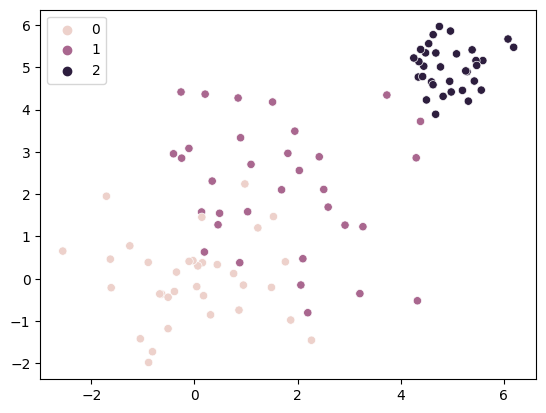

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=X, x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

2. (**0.5pt**) Based on the plot, is a classifier with a linear margin a good choice for this classification task?

**answer**

Yes the data points could be well seperated with a linear margin although not perfectly.


**3. (1pt) Split you data into *training*, *validation*, and *test* sets.**
- Use 60% of the data for training, 20% for validation, and 20% for testing
- If using `train_test_split` function from `scikit-learn`, use `random state=1234`

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1234)

4. **(1pt)** Explore the distribution of the classes in the entire dataset, training set, validation set, and test set.

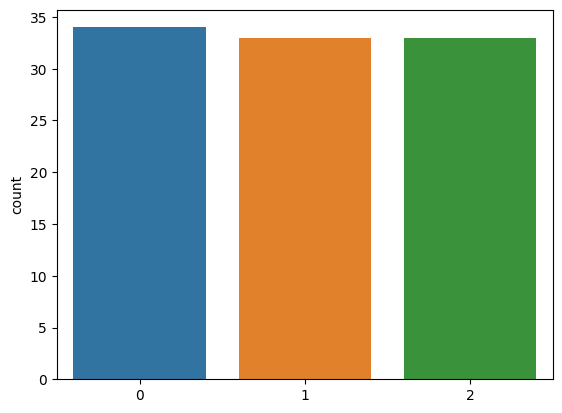

In [ ]:
# distribution of the entire dataset
sns.countplot(x=y)
plt.show()

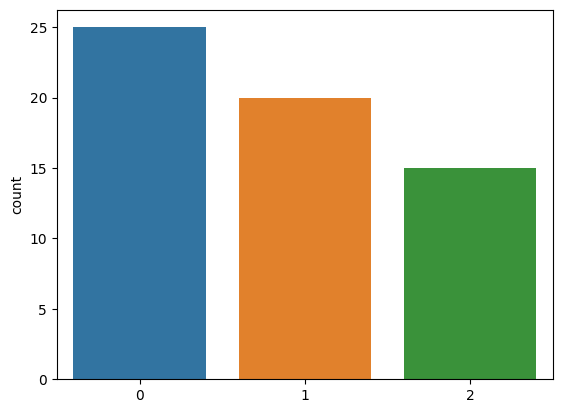

In [ ]:
# distribution of the training set
sns.countplot(x=y_train)
plt.show()

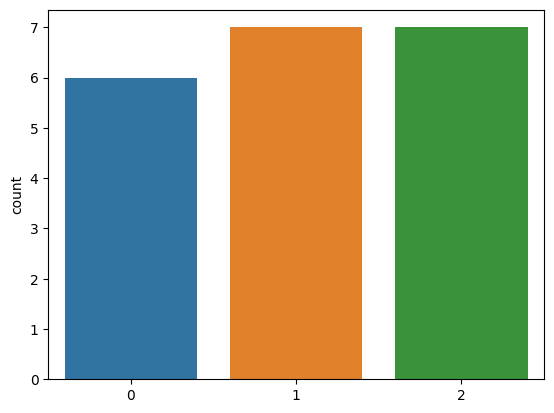

In [ ]:
# distribution of the validation set
sns.countplot(x=y_val)
plt.show()

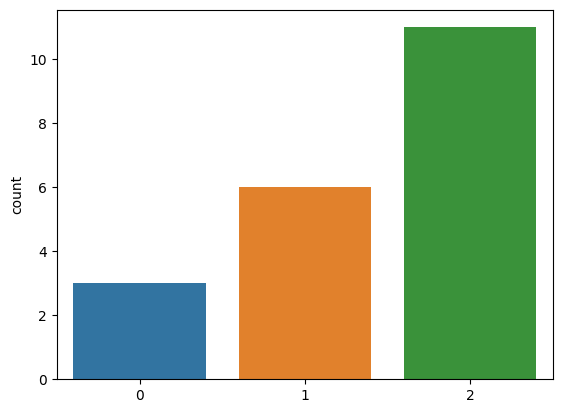

In [ ]:
# distribution of the test set
sns.countplot(x=y_test)
plt.show()

5. **(0.5pt)** Is each subset balanced?


**answer**

No they are not. The entire dataset is balanced betweem the three classes, however, the trainning has an over representation of class 0 while the test set has an under representation of class 0. The oppposite effect is observed with class 2.

6. **(0.5pt)** How can the imbalance of each subset affect prediction accuracy?

**answer**

The imbalance will most probably decrease the accuracy of the model. The model will be more inclined to predict class 0 since it is the most prominant class in the trainning set. However, when we will test for the generalization of the model, the performance will be bad since class 0 is under represented. If we do not use stratification in our split, then the performance of the model will vary significantly depending on how the data is split into training and testing datasets. This is not desirable since we want our model to be as stable as possible.

7. **0.5** If the training/validation/test sets are not balanced, adjust your code to recreate balanced training/validation/test sets.

*Hint:* You may use the `stratify` argument in the `train_test_split` function to help with the balance of the splits.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1234, stratify=y_train)

## SVM for classfication

8. **(1pt)** Train a linear SVM on the training set for each one of these C hyperparameter values: {0:001; 0:01; 0:1; 1; 10}. Find the best hyperparameter on the validation set.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C_values = [0.001, 0.01, 0.1, 1, 10]
best_C = None
best_accuracy = -1

for C in C_values:
    svm = LinearSVC(C=C,max_iter=10000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy for C={C}: {accuracy}")
    f1 = f1_score(y_val, y_pred, average='weighted')
    print(f"F1 score for C={C}: {f1:.2f}\n")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

print(f"Best hyperparameter: C={best_C}, based on accuracy score")


Accuracy for C=0.001: 0.5
F1 score for C=0.001: 0.43

Accuracy for C=0.01: 0.65
F1 score for C=0.01: 0.63

Accuracy for C=0.1: 0.8
F1 score for C=0.1: 0.80

Accuracy for C=1: 0.9
F1 score for C=1: 0.90

Accuracy for C=10: 0.9
F1 score for C=10: 0.90

Best hyperparameter: C=1, based on accuracy score


9. **(1pt)** Using the best hyperparameter C, evaluate the accuracy, precision, recall, and F1-score on the test set.

In [ ]:
svm = LinearSVC(C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.85
Precision: 0.88
Recall: 0.85
F1-score: 0.83


10. **(0.5pt)** Plot the confusion matrix on the test set and explain the reason for your false negatives/positives.

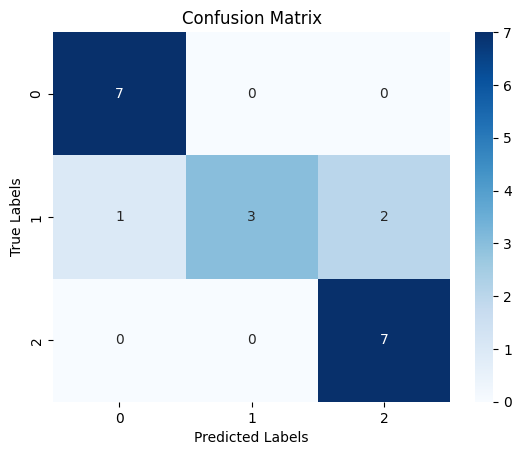

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


**Observations**

The only class with missclassification is class 1. This is not very surprising since class 0 and 2 are very distant from one another in a euclidean way as seen previously in the first plot. This means they are easy to seperate. However, class 1 was harder to seperate from the other class in a linear fashion.

# Regression **(13pt)**
You will now train k-NN and neural network models for the task of predicting
the rating of a text review.

The data to download are **[here](https://raw.githubusercontent.com/davoodwadi/MATH60629A.A2023-MACHINE-LEARNING-I/main/data/reviews.tsv)**.

Each datum is a review in text format of an Amazon product.
In the data file, each line corresponds to a datum. Each datum contains a target (y) followed by a short text (x). The target variable is the rating given by a user to a product. It is an integer value between 1 and 5. The text is the review.

To pre-process the data you will first have to separate the targets from the features.
*Hint: you can use the `split(’\t’)` function. There are also functions in `pandas` that will allow you to easily load this dataset.*

We will model this task as a regression problem (you can use mean squared error to measure performance).
1. **(0.5pt)** If we had decided to model this task as a classification problem with 5 classes, what are some of the metrics we could have used to measure performance?

**answer**

Since this is an ordinal regression, evaluating this model with a classification metric may not be the best idea. Some standard classification metrics that could be used are accuracy or F1 score.


2. List one **(0.5pt)** advantage and one **(0.5pt)** disadvantage of instead modelling the problem as a classification problem with 5 classes.

**answer**

Advantage:

Classification won't extrapolate out of the rating scale, it will not give 7.5 as an answer for a 1 to 5 integer scale.

Disadvantage:

By modeling as a classification with accuracy as a performance metric, you do not penalise more for large error. It is a hit or miss. While in regression it is a spectrum. Predicting 1 for a 5 yields a higher loss than 1 for a 2. One could argue that client satisfaction is more of a continous variable and would be better evaluated with a regression.



In [ ]:
# download and load the dataset
!wget -P /content https://raw.githubusercontent.com/davoodwadi/MATH60629A.A2023-MACHINE-LEARNING-I/main/data/reviews.tsv

import pandas as pd
df = pd.read_csv('reviews.tsv', sep='\t', names=['y', 'X'])

--2023-10-21 15:33:25--  https://raw.githubusercontent.com/davoodwadi/MATH60629A.A2023-MACHINE-LEARNING-I/main/data/reviews.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5569484 (5.3M) [text/plain]
Saving to: ‘/content/reviews.tsv’

reviews.tsv         100%[===================>]   5.31M  --.-KB/s    in 0.06s   

2023-10-21 15:33:26 (95.4 MB/s) - ‘/content/reviews.tsv’ saved [5569484/5569484]



3. **(0.5pt)** Divide the datasets into training (80% of the data), validation (10%), and test sets (10%). For this set the random seed to $1234$
(`random state=1234`)

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=1234, stratify=df.y)
val, test = train_test_split(test, test_size=0.5, random_state=1234, stratify=test.y)

4. **(2pt)** Now you must obtain a bag-of-words representation of the features.
sklearn provides several functions for doing so.

To limit the required training time, please use a maximum of 2,000 words
in your vocabulary (`max features=2000`) and the list of english stop words
from sklearn (`stop words="english"`). Words on this list will be automatically removed from the data since they are, a priori, less predictive for
the task at hand. Use the default value for all other function parameters.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Replace nan in X
print(train.X.isna().sum(), 'nan values, vectorizer does not seem to like them much')
train.X.fillna(' ', inplace=True)
val.X.fillna(' ', inplace=True)
test.X.fillna(' ', inplace=True)

#Vectorize
vectorizer = CountVectorizer(max_features=2000, stop_words="english")
vectorizer.fit(train.X)
X_train = vectorizer.transform(train.X)
X_val = vectorizer.transform(val.X)
X_test = vectorizer.transform(test.X)

#For convention
y_train = train.y
y_val = val.y
y_test = test.y


6 nan values, vectorizer does not seem to like them much


**k-nearest neighbours**
5. **(0.5pt)** Which of the following three distance functions ‘cosine’, ’euclidean’,
and ‘manhattan’ do you deem more appropriate for this problem? Please
justify.

**answer**
I believe cosine distance is the most appropriate since we do not really care about the magnitude of the vectors (length of review) but more about its direction (degree of satisfaction)

6. **(1pt)** Train an appropriate k-NN model for this
task. We ask that you train models with 1, 10, 50, 100, and 1000 neighbours.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [1, 10, 50, 100, 1000]
models = []

# Loop over the k values and create a model for each value
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k, metric='cosine')
    model.fit(X_train, y_train)
    models.append(model)


7. **(0.5pt)** What is the performance of each model on the training and validation
sets?

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict the labels of your train/val data for each model
y_preds_train = [model.predict(X_train) for model in models]
y_preds_val = [model.predict(X_val) for model in models]

# Calculate the MSE of each model
mses_train = []
for y_pred in y_preds_train:
    mse = mean_squared_error(y_train, y_pred)
    mses_train.append(mse)

mses_val = []
for y_pred in y_preds_val:
    mse = mean_squared_error(y_val, y_pred)
    mses_val.append(mse)

# Print the MSEs
print('Performance on training set: ')
for k, mse in zip(k_values, mses_train):
    print(f'MSE with {k} neighbors: {mse:.3f}')

print('\nPerformance on validation set: ')
for k, mse in zip(k_values, mses_val):
    print(f'MSE with {k} neighbors: {mse:.3f}')


Performance on training set: 
MSE with 1 neighbors: 0.001
MSE with 10 neighbors: 0.706
MSE with 50 neighbors: 0.811
MSE with 100 neighbors: 0.835
MSE with 1000 neighbors: 0.893

Performance on validation set: 
MSE with 1 neighbors: 1.472
MSE with 10 neighbors: 0.870
MSE with 50 neighbors: 0.850
MSE with 100 neighbors: 0.860
MSE with 1000 neighbors: 0.904


**Observations**

8. **(0.5pt)** What value of the hyperparameter provides the best results?

**answer**

k = 50 provides the best performance based on the validation set.

In [ ]:
# Measuring the performance of the model on the test set for future reference
knn = KNeighborsRegressor(n_neighbors=50, metric='cosine')
knn.fit(X_train, y_train)
mse_knn = mean_squared_error(y_test, knn.predict(X_test))
mse_knn

0.8495211999999999

**Neural Networks**

Upon instantiating your neural networks, fix the random seed to 1234 (that is
`random state=1234`).

9. **(2pt)** You will now train a series of neural networks using different hyperparameters. Use the option `early_stopping=True` and find the hyperparameters that obtain the best results on the validation dataset (to give
you an idea, I imagine that you will train around 50 different models).
I suggest that you explore the following three hyperarameters: *learning_rate*, *size of the network*, and *the strength of the L2 regularization term*.

In [ ]:
from sklearn.neural_network import MLPRegressor
import itertools

results = {'mse' : [],
           'learning_rate' : [],
           'alpha' : [],
           'hidden_layer_sizes' : []}

#hyperparams to validate
learning_rate = ['constant', 'adaptive']
alpha = [(10**-i) for i in range(-2,2)]
hidden_layer_sizes = [(h,)*w for h in range(4,16,4) for w in [1,2,4,8]]

for l, a, s in itertools.product(learning_rate, alpha, hidden_layer_sizes):

    mlp = MLPRegressor(early_stopping = True,
                       random_state = 1234 ,
                       solver = 'sgd',
                       learning_rate = l,
                       alpha = a,
                       hidden_layer_sizes = s)

    mlp.fit(X_train, y_train)
    mse = mean_squared_error(y_val, mlp.predict(X_val))
    results['mse'].append(mse)
    results['alpha'].append(a)
    results['learning_rate'].append(l)
    results['hidden_layer_sizes'].append(s)
    df = pd.DataFrame(results)

df_sorted = df.sort_values(by="mse", ascending=True)
df_sorted.head(10)

0.9363252704425735 constant 100 (4,)
0.9412784610098193 constant 100 (4, 4)
0.9747640000908341 constant 100 (4, 4, 4, 4)
0.974773646022279 constant 100 (4, 4, 4, 4, 4, 4, 4, 4)
0.9171841038505749 constant 100 (8,)
0.9440164480618698 constant 100 (8, 8)
0.9751603537073529 constant 100 (8, 8, 8, 8)
0.9754920397813527 constant 100 (8, 8, 8, 8, 8, 8, 8, 8)
0.9024164066513919 constant 100 (12,)
0.9532594237594496 constant 100 (12, 12)
0.9752578238851406 constant 100 (12, 12, 12, 12)
0.9793410422054107 constant 100 (12, 12, 12, 12, 12, 12, 12, 12)
0.7725904520473399 constant 10 (4,)
0.7481983533439661 constant 10 (4, 4)
0.9745185134933669 constant 10 (4, 4, 4, 4)
0.9747736460049331 constant 10 (4, 4, 4, 4, 4, 4, 4, 4)
0.7758489890285463 constant 10 (8,)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7530849711393574 constant 10 (8, 8)
0.6981292397036188 constant 10 (8, 8, 8, 8)
0.9703279494862577 constant 10 (8, 8, 8, 8, 8, 8, 8, 8)
0.761931530972199 constant 10 (12,)
0.736173319709316 constant 10 (12, 12)
0.7052152609860535 constant 10 (12, 12, 12, 12)
0.9697382283234852 constant 10 (12, 12, 12, 12, 12, 12, 12, 12)
0.7866066835098195 constant 1 (4,)
0.7769879157617086 constant 1 (4, 4)
0.9734837058570719 constant 1 (4, 4, 4, 4)
0.9747736460031553 constant 1 (4, 4, 4, 4, 4, 4, 4, 4)
0.7819881884830208 constant 1 (8,)
0.7687273121940293 constant 1 (8, 8)
0.7122606692139137 constant 1 (8, 8, 8, 8)
0.7231666917436805 constant 1 (8, 8, 8, 8, 8, 8, 8, 8)
0.7778811484963396 constant 1 (12,)
0.7831038519252563 constant 1 (12, 12)
0.7392940070567674 constant 1 (12, 12, 12, 12)
0.7425461068318764 constant 1 (12, 12, 12, 12, 12, 12, 12, 12)
0.7906497165316945 constant 0.1 (4,)
0.788045210103453 constant 0.1 (4, 4)
0.9728713800546668 constant 0.1 (4, 4, 4, 4)
0.9747736460029769 constant 0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7725904520473399 adaptive 10 (4,)
0.7481983533439661 adaptive 10 (4, 4)
0.9745185134933669 adaptive 10 (4, 4, 4, 4)
0.9747736460049331 adaptive 10 (4, 4, 4, 4, 4, 4, 4, 4)
0.7713698129540271 adaptive 10 (8,)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7530849711393574 adaptive 10 (8, 8)
0.6981292397036188 adaptive 10 (8, 8, 8, 8)
0.9703279494862577 adaptive 10 (8, 8, 8, 8, 8, 8, 8, 8)
0.7591374770879843 adaptive 10 (12,)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.736173319709316 adaptive 10 (12, 12)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7037041335449019 adaptive 10 (12, 12, 12, 12)
0.9697382283234852 adaptive 10 (12, 12, 12, 12, 12, 12, 12, 12)
0.7866066835098195 adaptive 1 (4,)
0.7769879157617086 adaptive 1 (4, 4)
0.9734427069312876 adaptive 1 (4, 4, 4, 4)
0.9747736460031553 adaptive 1 (4, 4, 4, 4, 4, 4, 4, 4)
0.7819881884830208 adaptive 1 (8,)
0.7687273121940293 adaptive 1 (8, 8)
0.7122606692139137 adaptive 1 (8, 8, 8, 8)
0.7231666917436805 adaptive 1 (8, 8, 8, 8, 8, 8, 8, 8)
0.7783618998282026 adaptive 1 (12,)
0.7831038519252563 adaptive 1 (12, 12)
0.7392940070567674 adaptive 1 (12, 12, 12, 12)
0.7425461068318764 adaptive 1 (12, 12, 12, 12, 12, 12, 12, 12)
0.7906497165316945 adaptive 0.1 (4,)
0.788045210103453 adaptive 0.1 (4, 4)
0.9727608698897742 adaptive 0.1 (4, 4, 4, 4)
0.9747736460029769 adaptive 0.1 (4, 4, 4, 4, 4, 4, 4, 4)
0.7881955930257397 adaptive 0.1 (8,)
0.7739548540729217 adaptive 0.1 (8, 8)
0.7215833903499672 adaptive 0.1 (8, 8, 8, 8)
0.7282974135151167 adaptive 0.1 (8, 8, 8, 8, 8, 8, 8, 8)
0.788876

Note: I did leave the Stochastic Optimizer: Maximum iterations (200) to its default value of 200 due to the amount of time required to train this model.

In [ ]:
#Here are the results if you do not want to run the code above
d = {'mse': {18: 0.6981292397036188, 66: 0.6981292397036188, 70: 0.7037041335449019, 22: 0.7052152609860535, 78: 0.7122606692139137, 30: 0.7122606692139137, 90: 0.7215833903499672, 42: 0.7215833903499672, 31: 0.7231666917436805, 79: 0.7231666917436805, 43: 0.7282974135151167, 91: 0.7282974135151167, 21: 0.736173319709316, 69: 0.736173319709316, 82: 0.7392940070567674, 34: 0.7392940070567674, 83: 0.7425461068318764, 35: 0.7425461068318764, 61: 0.7481983533439661, 13: 0.7481983533439661, 65: 0.7530849711393574, 17: 0.7530849711393574, 46: 0.7560606247908829, 94: 0.7560606247908829, 68: 0.7591374770879843, 47: 0.7600477797469757, 95: 0.7600477797469757, 20: 0.761931530972199, 77: 0.7687273121940293, 29: 0.7687273121940293, 64: 0.7713698129540271, 12: 0.7725904520473399, 60: 0.7725904520473399, 89: 0.7739548540729217, 41: 0.7739548540729217, 16: 0.7758489890285463, 73: 0.7769879157617086, 25: 0.7769879157617086, 32: 0.7778811484963396, 80: 0.7783618998282026, 76: 0.7819881884830208, 28: 0.7819881884830208, 81: 0.7831038519252563, 33: 0.7831038519252563, 24: 0.7866066835098195, 72: 0.7866066835098195, 37: 0.788045210103453, 85: 0.788045210103453, 40: 0.7881955930257397, 88: 0.7881955930257397, 45: 0.7887391844519199, 93: 0.7887391844519199, 44: 0.7888768904451026, 92: 0.7888768904451026, 84: 0.7906497165316945, 36: 0.7906497165316945, 56: 0.9024164066513919, 8: 0.9024164066513919, 4: 0.9171841038505749, 52: 0.9171841038505749, 0: 0.9363252704425735, 48: 0.9363252704425735, 49: 0.9412784610098193, 1: 0.9412784610098193, 5: 0.9440164480618698, 53: 0.9440164480618698, 57: 0.9532594237594496, 9: 0.9532594237594496, 71: 0.9697382283234852, 23: 0.9697382283234852, 19: 0.9703279494862577, 67: 0.9703279494862577, 86: 0.9727608698897742, 38: 0.9728713800546668, 74: 0.9734427069312876, 26: 0.9734837058570719, 14: 0.9745185134933669, 62: 0.9745185134933669, 2: 0.9747640000908341, 50: 0.9747640000908341, 39: 0.9747736460029769, 87: 0.9747736460029769, 27: 0.9747736460031553, 75: 0.9747736460031553, 15: 0.9747736460049331, 63: 0.9747736460049331, 3: 0.974773646022279, 51: 0.974773646022279, 54: 0.9751603537073529, 6: 0.9751603537073529, 58: 0.9752047796294839, 10: 0.9752578238851406, 55: 0.9754920397813527, 7: 0.9754920397813527, 59: 0.9774420870408574, 11: 0.9793410422054107}, 'learning_rate': {18: 'constant', 66: 'adaptive', 70: 'adaptive', 22: 'constant', 78: 'adaptive', 30: 'constant', 90: 'adaptive', 42: 'constant', 31: 'constant', 79: 'adaptive', 43: 'constant', 91: 'adaptive', 21: 'constant', 69: 'adaptive', 82: 'adaptive', 34: 'constant', 83: 'adaptive', 35: 'constant', 61: 'adaptive', 13: 'constant', 65: 'adaptive', 17: 'constant', 46: 'constant', 94: 'adaptive', 68: 'adaptive', 47: 'constant', 95: 'adaptive', 20: 'constant', 77: 'adaptive', 29: 'constant', 64: 'adaptive', 12: 'constant', 60: 'adaptive', 89: 'adaptive', 41: 'constant', 16: 'constant', 73: 'adaptive', 25: 'constant', 32: 'constant', 80: 'adaptive', 76: 'adaptive', 28: 'constant', 81: 'adaptive', 33: 'constant', 24: 'constant', 72: 'adaptive', 37: 'constant', 85: 'adaptive', 40: 'constant', 88: 'adaptive', 45: 'constant', 93: 'adaptive', 44: 'constant', 92: 'adaptive', 84: 'adaptive', 36: 'constant', 56: 'adaptive', 8: 'constant', 4: 'constant', 52: 'adaptive', 0: 'constant', 48: 'adaptive', 49: 'adaptive', 1: 'constant', 5: 'constant', 53: 'adaptive', 57: 'adaptive', 9: 'constant', 71: 'adaptive', 23: 'constant', 19: 'constant', 67: 'adaptive', 86: 'adaptive', 38: 'constant', 74: 'adaptive', 26: 'constant', 14: 'constant', 62: 'adaptive', 2: 'constant', 50: 'adaptive', 39: 'constant', 87: 'adaptive', 27: 'constant', 75: 'adaptive', 15: 'constant', 63: 'adaptive', 3: 'constant', 51: 'adaptive', 54: 'adaptive', 6: 'constant', 58: 'adaptive', 10: 'constant', 55: 'adaptive', 7: 'constant', 59: 'adaptive', 11: 'constant'}, 'alpha': {18: 10.0, 66: 10.0, 70: 10.0, 22: 10.0, 78: 1.0, 30: 1.0, 90: 0.1, 42: 0.1, 31: 1.0, 79: 1.0, 43: 0.1, 91: 0.1, 21: 10.0, 69: 10.0, 82: 1.0, 34: 1.0, 83: 1.0, 35: 1.0, 61: 10.0, 13: 10.0, 65: 10.0, 17: 10.0, 46: 0.1, 94: 0.1, 68: 10.0, 47: 0.1, 95: 0.1, 20: 10.0, 77: 1.0, 29: 1.0, 64: 10.0, 12: 10.0, 60: 10.0, 89: 0.1, 41: 0.1, 16: 10.0, 73: 1.0, 25: 1.0, 32: 1.0, 80: 1.0, 76: 1.0, 28: 1.0, 81: 1.0, 33: 1.0, 24: 1.0, 72: 1.0, 37: 0.1, 85: 0.1, 40: 0.1, 88: 0.1, 45: 0.1, 93: 0.1, 44: 0.1, 92: 0.1, 84: 0.1, 36: 0.1, 56: 100.0, 8: 100.0, 4: 100.0, 52: 100.0, 0: 100.0, 48: 100.0, 49: 100.0, 1: 100.0, 5: 100.0, 53: 100.0, 57: 100.0, 9: 100.0, 71: 10.0, 23: 10.0, 19: 10.0, 67: 10.0, 86: 0.1, 38: 0.1, 74: 1.0, 26: 1.0, 14: 10.0, 62: 10.0, 2: 100.0, 50: 100.0, 39: 0.1, 87: 0.1, 27: 1.0, 75: 1.0, 15: 10.0, 63: 10.0, 3: 100.0, 51: 100.0, 54: 100.0, 6: 100.0, 58: 100.0, 10: 100.0, 55: 100.0, 7: 100.0, 59: 100.0, 11: 100.0}, 'hidden_layer_sizes': {18: (8, 8, 8, 8), 66: (8, 8, 8, 8), 70: (12, 12, 12, 12), 22: (12, 12, 12, 12), 78: (8, 8, 8, 8), 30: (8, 8, 8, 8), 90: (8, 8, 8, 8), 42: (8, 8, 8, 8), 31: (8, 8, 8, 8, 8, 8, 8, 8), 79: (8, 8, 8, 8, 8, 8, 8, 8), 43: (8, 8, 8, 8, 8, 8, 8, 8), 91: (8, 8, 8, 8, 8, 8, 8, 8), 21: (12, 12), 69: (12, 12), 82: (12, 12, 12, 12), 34: (12, 12, 12, 12), 83: (12, 12, 12, 12, 12, 12, 12, 12), 35: (12, 12, 12, 12, 12, 12, 12, 12), 61: (4, 4), 13: (4, 4), 65: (8, 8), 17: (8, 8), 46: (12, 12, 12, 12), 94: (12, 12, 12, 12), 68: (12,), 47: (12, 12, 12, 12, 12, 12, 12, 12), 95: (12, 12, 12, 12, 12, 12, 12, 12), 20: (12,), 77: (8, 8), 29: (8, 8), 64: (8,), 12: (4,), 60: (4,), 89: (8, 8), 41: (8, 8), 16: (8,), 73: (4, 4), 25: (4, 4), 32: (12,), 80: (12,), 76: (8,), 28: (8,), 81: (12, 12), 33: (12, 12), 24: (4,), 72: (4,), 37: (4, 4), 85: (4, 4), 40: (8,), 88: (8,), 45: (12, 12), 93: (12, 12), 44: (12,), 92: (12,), 84: (4,), 36: (4,), 56: (12,), 8: (12,), 4: (8,), 52: (8,), 0: (4,), 48: (4,), 49: (4, 4), 1: (4, 4), 5: (8, 8), 53: (8, 8), 57: (12, 12), 9: (12, 12), 71: (12, 12, 12, 12, 12, 12, 12, 12), 23: (12, 12, 12, 12, 12, 12, 12, 12), 19: (8, 8, 8, 8, 8, 8, 8, 8), 67: (8, 8, 8, 8, 8, 8, 8, 8), 86: (4, 4, 4, 4), 38: (4, 4, 4, 4), 74: (4, 4, 4, 4), 26: (4, 4, 4, 4), 14: (4, 4, 4, 4), 62: (4, 4, 4, 4), 2: (4, 4, 4, 4), 50: (4, 4, 4, 4), 39: (4, 4, 4, 4, 4, 4, 4, 4), 87: (4, 4, 4, 4, 4, 4, 4, 4), 27: (4, 4, 4, 4, 4, 4, 4, 4), 75: (4, 4, 4, 4, 4, 4, 4, 4), 15: (4, 4, 4, 4, 4, 4, 4, 4), 63: (4, 4, 4, 4, 4, 4, 4, 4), 3: (4, 4, 4, 4, 4, 4, 4, 4), 51: (4, 4, 4, 4, 4, 4, 4, 4), 54: (8, 8, 8, 8), 6: (8, 8, 8, 8), 58: (12, 12, 12, 12), 10: (12, 12, 12, 12), 55: (8, 8, 8, 8, 8, 8, 8, 8), 7: (8, 8, 8, 8, 8, 8, 8, 8), 59: (12, 12, 12, 12, 12, 12, 12, 12), 11: (12, 12, 12, 12, 12, 12, 12, 12)}}
res = pd.DataFrame(d)
res.head()

,mse,learning_rate,alpha,hidden_layer_sizes
18,0.698129,constant,10.0,"(8, 8, 8, 8)"
66,0.698129,adaptive,10.0,"(8, 8, 8, 8)"
70,0.703704,adaptive,10.0,"(12, 12, 12, 12)"
22,0.705215,constant,10.0,"(12, 12, 12, 12)"
78,0.712261,adaptive,1.0,"(8, 8, 8, 8)"


10. **(0.5pt)** Find the MSE on the test set for the best hyperparameter.

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(early_stopping = True,
                       random_state = 1234 ,
                       solver = 'sgd',
                       learning_rate = 'adaptive',
                       alpha = 10,
                       hidden_layer_sizes = (8,8,8,8))

mlp.fit(X_train, y_train)
mse_nn = mean_squared_error(y_test, mlp.predict(X_test))
print(mse_nn)

0.6922215355519573


11. (0.5pt) What did you find out about the importance of the various hyperparameters?


**answer**

I found out that larger models are not always better even if you increase regularization to prevent overfitting. Also, I observed that the constant learning rate and adaptive often found the same minimum when they had the same model. I had to remove the invscaling learning rate because it took too long to converge. Fine tuning these parameters takes time and can impact performance alot.

**Comparison**

12. **(0.5pt)** Based on the neural network that you trained, if you were to keep a single feature (that is a single word), which one would it be and why?

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=6a33f5e02fc5ca95d45f8572d944ef7021c847798dcc7729328a01e754eed737
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(mlp).fit(X_test.toarray(), y_test)
eli5.show_weights(perm)

Weight,Feature
0.0299 ± 0.0151,x763
0.0244 ± 0.0119,x1025
0.0227 ± 0.0163,x1029
0.0192 ± 0.0068,x479
0.0162 ± 0.0112,x703
0.0103 ± 0.0081,x822
0.0082 ± 0.0076,x790
0.0079 ± 0.0035,x1770
0.0076 ± 0.0028,x168
0.0074 ± 0.0086,x1243


In [ ]:
feature_names = vectorizer.get_feature_names_out()
feature_names[763]

'great'

**answer**

Features permutations allows us to identify the most important feature in our model. This is done by replacing a feature data points by random noise in the test set and measuring the impact on the score of the model. This saves us the trouble of refitting the model each time. The most important feature found using this method is the word 'great'. This makes sense intuitively since it is a common word that is easily associated with the sentiment of the customer.

13. **(0.5pt)** What is the final performance of each model (k-NN, and neural
network)?

In [ ]:
print(f'The performance of K-NN is :{mse_knn}')
print(f'The performance of Neural Network is :{mse_nn}')

The performance of K-NN is :0.8495211999999999
The performance of Neural Network is :0.6922215355519573


14. **(1pt)** Find all the examples for which the prediction of the k-NN and the neural network differ by more than $2.0$.

In [ ]:
print('There is',sum(abs(mlp.predict(X_test)-knn.predict(X_test))>2), 'example where predictions differ by more than 2:\n')
test[abs(mlp.predict(X_test)-knn.predict(X_test))>2].loc[1125,'X']

There is 1 example where predictions differ by more than 2:



'I initially enjoyed playing this game due to the co-op nature and how intriguing/random it is but as I\'ve played it more and more, I\'ve begun to dislike it more and more.  There is so much happening with the game but the payoff is rarely worth it.  I\'ll play it if my group is playing it but otherwise, I want nothing to do with it.Basic Play - You select a character, your choice or at random, and get all equipment/money they are entitled to.  Select a random Ancient One to battle.  You spend the rest of the game navigating the board looking for clues, buying items, getting skills/spells/allies, fighting enemies and going into portals to close/seal them.  Your character card has stats you can change at the beginning of every turn.  For example, you can increase your ability to move around the board faster but this decreases your ability to sneak past enemies.  You can increase your luck but this decreases your lore.  Each character has their own individual max/minimums for each stat,

15. **(0.5pt)** Plot the distribution of the actual labels, and the predicted labels from k-NN and neural network.

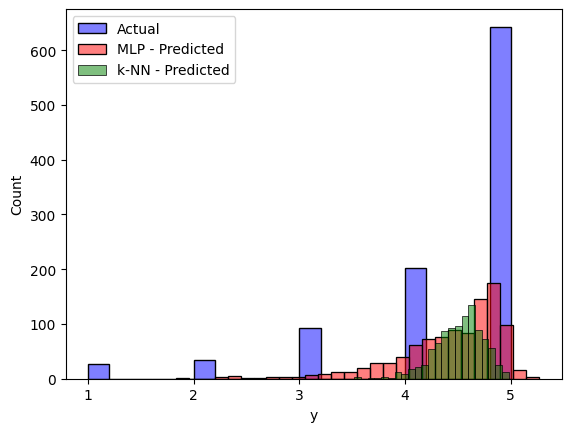

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# actual labels
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual')

# predicted labels
sns.histplot(mlp.predict(X_test), color='red', alpha=0.5, label='MLP - Predicted')

# predicted labels
sns.histplot(knn.predict(X_test), color='green', alpha=0.5, label='k-NN - Predicted')

plt.legend()
plt.show()


16. **(0.5pt)** Explain the reason behind the difference in prediction from k-NN and the actual labels.

**answer**

First of all, we used regression in a context where the y-label were classes therefore we would expect to see the predictions follow a continuous distribution and the actual label a discrete distribution. Thus, the difference in distribution is expected.

Secondly, the dataset is higly skewed, there is a lot more of 4-5 ratings than 1-2. This will make our model less inclined to predict lower values. Hence why we do not have many prediction under 3 stars.

Thirdly, each feature (words) have equal weight in knn. This may be a reason that explains the differences between the actual label and the prediction of the model. Indeed some words might have a better predictive power than others and should have a higher weight.

17. **(0.5pt)** Explain the reason behind the difference in prediction from the neural network and the actual labels.

**answer**

The two first reason given above also apply here.

Furthermore outliers in the dataset can impact neural network in a negative way.

Finaly, there is always randomness that cannot be captured by our model.